<a href="https://colab.research.google.com/github/josueelias9/AI-Machine_learning_with_Tensorflow/blob/main/Convolutional%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


170508288/170498071 [==============================] - 4s 0us/step


In [3]:
train_images , test_images = train_images/255.0 , test_images/255.0 

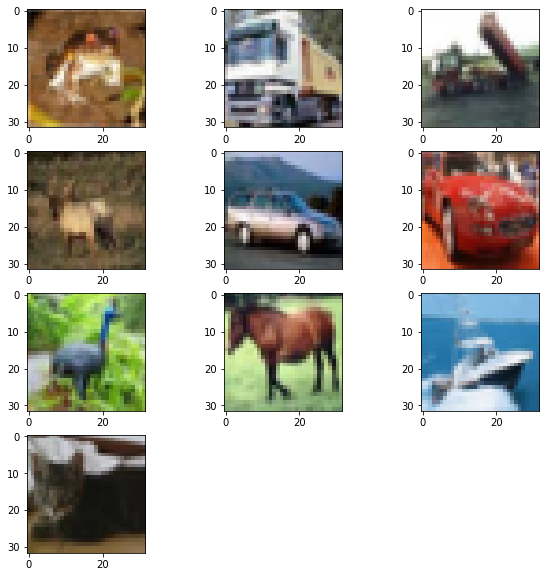

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#plt.figure(figsize=(10,10))
#for i in range(4):
#  plt.subplot(5,5,i+1)

plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(4,3,i+1)
  plt.grid(False)
  plt.imshow(train_images[i])
plt.show()
#plt.imshow(train_images[0])


In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
  40/1563 [..............................] - ETA: 1:15 - loss: 2.2697 - accuracy: 0.1375

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [1]:
history.history['acuracy']

NameError: ignored